In [4]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import astropy
from astropy import stats
import math

import scipy
from scipy import stats

from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)


from scipy import optimize
from scipy import special
from scipy import signal
import figurefirst as fifi

In [ ]:
df1=pd.read_hdf('Github repo/raw_data_for_me/small_10.20.20_maskedgpsdata.hdf')
df2=pd.read_hdf('Github repo/raw_data_for_me/small_7.7.21_maskedgpsdata.hdf')
df3=pd.read_hdf('Github repo/raw_data_for_me/small_9.26.21_maskedgpsdata.hdf')
df4=pd.read_hdf('Github repo/raw_data_for_me/small_10.29.21_maskedgpsdata.hdf')
df5=pd.read_hdf('Github repo/raw_data_for_me/small_10.30.21_maskedgpsdata.hdf')
df6=pd.read_hdf('Github repo/raw_data_for_me/small_1.8.22_maskedgpsdata.hdf')
df7=pd.read_hdf('Github repo/raw_data_for_me/small_1.11.22_maskedgpsdata.hdf')
df8=pd.read_hdf('Github repo/raw_data_for_me/small_1.15.22_maskedgpsdata.hdf')
df9=pd.read_hdf('Github repo/raw_data_for_me/small_4.30.22_maskedgpsdata.hdf')
df10=pd.read_hdf('Github repo/raw_data_for_me/small_5.1.22_maskedgpsdata.hdf')
df11=pd.read_hdf('Github repo/raw_data_for_me/small_5.2.22_maskedgpsdata.hdf')
df12=pd.read_hdf('Github repo/raw_data_for_me/small_6.1.22_maskedgpsdata.hdf')
df13=pd.read_hdf('Github repo/raw_data_for_me/small_6.3.22_maskedgpsdata.hdf')
df14=pd.read_hdf('Github repo/raw_data_for_me/small_6.7.22_maskedgpsdata.hdf')
df15=pd.read_hdf('Github repo/raw_data_for_me/small_6.8.22_maskedgpsdata.hdf')
df16=pd.read_hdf('Github repo/raw_data_for_me/small_6.22.22_maskedgpsdata.hdf')

In [2]:
df8=pd.read_hdf('raw_data_for_me/small_1.15.22_maskedgpsdata.hdf')

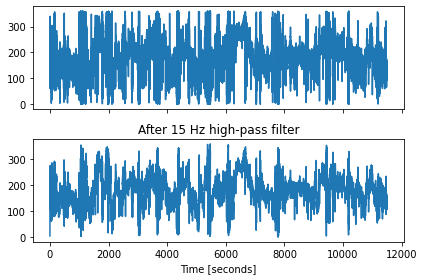

In [17]:
t = np.linspace(0, len(df8)/10, len(df8), False)  # 1 second
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, df8.D_4)
sos = signal.butter(2, 5, 'lp', fs=100, output='sos')
filtered = signal.sosfilt(sos, df8.D_4)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
#ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

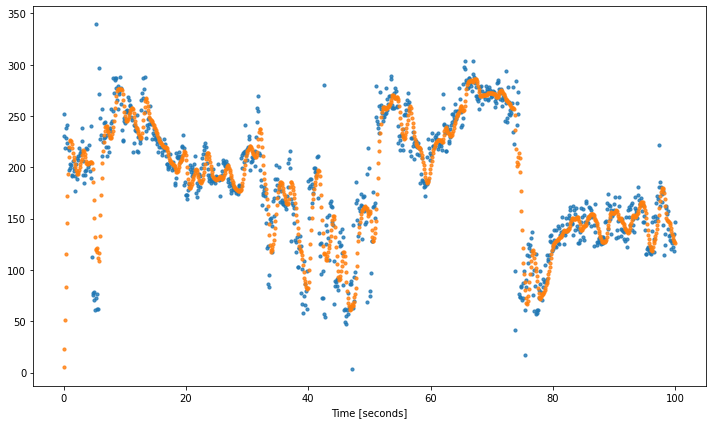

In [90]:
#t = np.linspace(0, len(df8)/10, len(df8), False)  # 1 second
t=np.linspace(0,100,1000)

fig, (ax) = plt.subplots(figsize=(10,6))
ax.scatter(t, df8.D_4.iloc[0:1000], s=10, alpha=.8)
sos = signal.butter(2, .5,  'lp', fs=10, output='sos')
filtered = signal.sosfilt(sos, df8.D_4.iloc[0:1000])
ax.scatter(t, filtered, s=10, alpha=.8)
#ax2.axis([0, 1, -2, 2])
ax.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

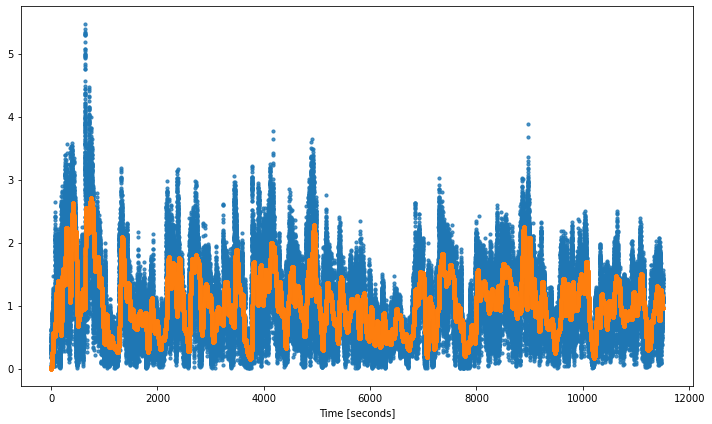

In [86]:
t = np.linspace(0, len(df8)/10, len(df8), False)  # 1 second
#t=np.linspace(0,100,1000)

fig, (ax) = plt.subplots(figsize=(10,6))
ax.scatter(t, df8.S2_4, s=10, alpha=.8)
sos = signal.butter(2, .01,  'lp', fs=10, output='sos')
filtered = signal.sosfilt(sos, df8.S2_4)
ax.scatter(t, filtered, s=10, alpha=.8)
#ax2.axis([0, 1, -2, 2])
ax.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

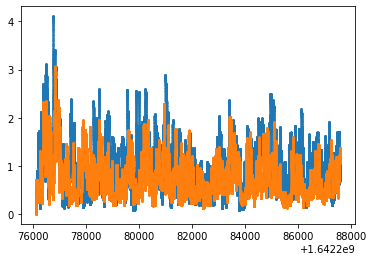

In [95]:
sos = signal.butter(2, .5,  'lp', fs=100, output='sos')

filtered1 = signal.sosfilt(sos, df8.S2_4)
filtered2 = signal.sosfilt(sos, df8.S2_6)

plt.scatter(df8.time,filtered1,s=1)
plt.scatter(df8.time,filtered2,s=1)


In [96]:
reduced=np.abs(filtered1-filtered2)

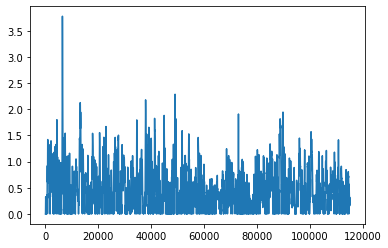

In [97]:
plt.plot(reduced)

In [102]:
np.mean(reduced[6000:12000])

0.5840204363823301

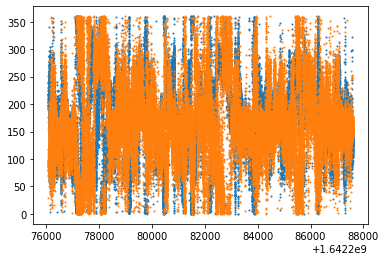

In [68]:
plt.scatter(df8.time,df8.D_4,s=1)
plt.scatter(df8.time,df8.D_6,s=1)



In [100]:
normalreduced=np.abs(df8.S2_4-df8.S2_6)

In [103]:
np.mean(normalreduced[6000:12000])

0.7156461666666679